# IAD Airport Flight Delay Stories Analysis

This notebook analyzes flight delay data for Washington DC's Dulles International Airport (IAD) to uncover 6 compelling stories based on real patterns in the data. We'll examine temporal trends, route patterns, and external factors that could explain delay variations at this major international hub.

## Objective
Create 6 data-driven hypothetical stories that explain delay patterns at IAD, considering:
- Seasonal variations and holiday periods
- Weather impacts specific to the DC region
- IAD's role as an international hub
- Business travel patterns to/from the nation's capital
- Special events and political activities in Washington DC
- Route changes and airline operational decisions

## Section 1: Import Required Libraries and Load Data

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Load the dataset
df = pd.read_csv('Combined Data_Detailed_Statistics_Departures.csv')

# Display basic information about the dataset
print("Dataset shape:", df.shape)
print("\nColumn names and types:")
print(df.dtypes)
print("\nFirst few rows:")
df.head()

Dataset shape: (92650, 17)

Column names and types:
Carrier Code                                object
Date (MM/DD/YYYY)                           object
Flight Number                                int64
Tail Number                                 object
Destination Airport                         object
Scheduled departure time                    object
Actual departure time                       object
Scheduled elapsed time (Minutes)             int64
Actual elapsed time (Minutes)                int64
Departure delay (Minutes)                    int64
Wheels-off time                             object
Taxi-Out time (Minutes)                      int64
Delay Carrier (Minutes)                      int64
Delay Weather (Minutes)                      int64
Delay National Aviation System (Minutes)     int64
Delay Security (Minutes)                     int64
Delay Late Aircraft Arrival (Minutes)        int64
dtype: object

First few rows:


,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Destination Airport,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Wheels-off time,Taxi-Out time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
0,UA,07/01/2017,145,N67052,HNL,8:45,8:44,616,601,-1,9:01,17,0,0,0,0,0
1,UA,07/01/2017,221,N36469,ORD,14:02,13:57,121,135,-5,14:18,21,0,0,0,0,0
2,UA,07/01/2017,225,N445UA,SFO,22:05,0:46,342,317,161,0:55,9,136,0,0,0,0
3,UA,07/01/2017,229,N27213,SAN,8:15,8:12,317,308,-3,8:24,12,0,0,0,0,0
4,UA,07/01/2017,231,N37422,SAN,12:15,12:07,317,307,-8,12:17,10,0,0,0,0,0


## Section 2: Data Exploration and Overview

In [3]:
# Check for IAD flights (assuming the data contains origin/destination information)
print("Checking dataset columns for airport information:")
print(df.columns.tolist())

# Look for any IAD-related data
print("\nUnique destination airports (sample):")
if 'Destination Airport' in df.columns:
    unique_destinations = df['Destination Airport'].unique()
    print(f"Total unique destinations: {len(unique_destinations)}")
    print("Sample destinations:", unique_destinations[:10])
    
    # Check if IAD is in destinations
    iad_flights = df[df['Destination Airport'] == 'IAD']
    print(f"\nFlights TO IAD: {len(iad_flights)}")
    
    # Since we don't see origin column, let's assume this data might be FROM a specific airport
    print(f"\nTotal flights in dataset: {len(df)}")
    print(f"Date range: {df['Date (MM/DD/YYYY)'].min()} to {df['Date (MM/DD/YYYY)'].max()}")
else:
    print("No 'Destination Airport' column found. Let's examine what we have:")
    print(df.columns.tolist())

Checking dataset columns for airport information:
['Carrier Code', 'Date (MM/DD/YYYY)', 'Flight Number', 'Tail Number', 'Destination Airport', 'Scheduled departure time', 'Actual departure time', 'Scheduled elapsed time (Minutes)', 'Actual elapsed time (Minutes)', 'Departure delay (Minutes)', 'Wheels-off time', 'Taxi-Out time (Minutes)', 'Delay Carrier (Minutes)', 'Delay Weather (Minutes)', 'Delay National Aviation System (Minutes)', 'Delay Security (Minutes)', 'Delay Late Aircraft Arrival (Minutes)']

Unique destination airports (sample):
Total unique destinations: 61
Sample destinations: ['HNL' 'ORD' 'SFO' 'SAN' 'IAH' 'PDX' 'MCO' 'SMF' 'SEA' 'DFW']

Flights TO IAD: 0

Total flights in dataset: 92650
Date range: 07/01/2017 to 12/31/2024


In [4]:
# Since there are no flights TO IAD, this data likely represents flights FROM IAD
# Let's examine the destinations to understand the scope
print("All destination airports:")
destinations_count = df['Destination Airport'].value_counts()
print(destinations_count)

print(f"\nThis dataset appears to contain {len(df)} flights FROM IAD (Washington Dulles)")
print(f"to {len(destinations_count)} different destinations")
print(f"Date range: {df['Date (MM/DD/YYYY)'].min()} to {df['Date (MM/DD/YYYY)'].max()}")

# Check carriers
print(f"\nCarriers operating from IAD:")
print(df['Carrier Code'].value_counts())

All destination airports:
Destination Airport
DEN    8451
ATL    8270
LAX    7185
SFO    6941
SEA    4731
       ... 
CMH       6
RIC       6
CVG       4
MKE       1
SAV       1
Name: count, Length: 61, dtype: int64

This dataset appears to contain 92650 flights FROM IAD (Washington Dulles)
to 61 different destinations
Date range: 07/01/2017 to 12/31/2024

Carriers operating from IAD:
Carrier Code
UA    71910
DL     7758
WN     5018
AA     4096
AS     3868
Name: count, dtype: int64


## Section 3: Date Analysis and Pattern Identification

In [5]:
# Parse dates and create time-based features
df['Date'] = pd.to_datetime(df['Date (MM/DD/YYYY)'], format='%m/%d/%Y')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day_of_Week'] = df['Date'].dt.day_name()
df['Day_of_Year'] = df['Date'].dt.dayofyear
df['Week_of_Year'] = df['Date'].dt.isocalendar().week
df['Season'] = df['Month'].map({12: 'Winter', 1: 'Winter', 2: 'Winter',
                                3: 'Spring', 4: 'Spring', 5: 'Spring',
                                6: 'Summer', 7: 'Summer', 8: 'Summer',
                                9: 'Fall', 10: 'Fall', 11: 'Fall'})

# Create summary by year and month
monthly_summary = df.groupby(['Year', 'Month']).agg({
    'Flight Number': 'count',
    'Departure delay (Minutes)': ['mean', 'median', 'std'],
    'Delay Weather (Minutes)': 'sum',
    'Delay Carrier (Minutes)': 'sum',
    'Delay National Aviation System (Minutes)': 'sum'
}).round(2)

monthly_summary.columns = ['Flight_Count', 'Avg_Delay', 'Median_Delay', 'Std_Delay', 
                          'Total_Weather_Delay', 'Total_Carrier_Delay', 'Total_NAS_Delay']

print("Monthly flight patterns from IAD:")
print(monthly_summary.head(10))

Monthly flight patterns from IAD:
            Flight_Count  Avg_Delay  Median_Delay  Std_Delay  \
Year Month                                                     
2017 7              3001      19.18          -2.0      66.28   
     8              3061      11.38          -2.0      48.34   
     11             2499       1.50          -4.0      26.67   
     12             2570       5.75          -3.0      44.38   
2018 7              3406      16.47          -2.0      51.76   
     8              3400      16.22          -3.0      61.83   
     11             3088       5.72          -3.0      36.18   
     12             3058       5.53          -3.0      37.35   
2019 7              3297      16.75          -2.0      60.50   
     8              3142      13.12          -3.0      54.86   

            Total_Weather_Delay  Total_Carrier_Delay  Total_NAS_Delay  
Year Month                                                             
2017 7                     5467                14124 

## Story 1: Summer Storm Season - Weather Chaos at the Capital's Gateway

**Hypothesis**: IAD experiences significantly higher weather-related delays during summer months (June-August) due to the Washington DC area's notorious thunderstorm season, creating a perfect storm of delays that ripple through the national aviation system.

In [6]:
# Story 1 Analysis: Summer Weather Impact
seasonal_weather = df.groupby(['Season', 'Month']).agg({
    'Delay Weather (Minutes)': ['sum', 'mean'],
    'Flight Number': 'count',
    'Departure delay (Minutes)': 'mean'
}).round(2)

seasonal_weather.columns = ['Total_Weather_Delay', 'Avg_Weather_Delay_Per_Flight', 
                           'Flight_Count', 'Avg_Overall_Delay']

print("Weather delays by season:")
print(seasonal_weather)

# Focus on summer months (June, July, August)
summer_data = df[df['Month'].isin([6, 7, 8])]
non_summer_data = df[~df['Month'].isin([6, 7, 8])]

print(f"\nSummer vs Non-Summer Weather Impact:")
print(f"Summer months - Average weather delay per flight: {summer_data['Delay Weather (Minutes)'].sum() / len(summer_data):.2f} minutes")
print(f"Non-summer months - Average weather delay per flight: {non_summer_data['Delay Weather (Minutes)'].sum() / len(non_summer_data):.2f} minutes")

# Look at specific high-impact days
extreme_weather_days = df[df['Delay Weather (Minutes)'] > 60].groupby('Date').agg({
    'Flight Number': 'count',
    'Delay Weather (Minutes)': 'sum',
    'Departure delay (Minutes)': 'mean'
}).sort_values('Delay Weather (Minutes)', ascending=False)

print(f"\nTop 10 weather-impacted days at IAD:")
print(extreme_weather_days.head(10))

Weather delays by season:
              Total_Weather_Delay  Avg_Weather_Delay_Per_Flight  Flight_Count  \
Season Month                                                                    
Fall   11                    3464                          0.16         22316   
Summer 7                    52859                          2.25         23515   
       8                    66227                          2.76         23977   
Winter 12                    6139                          0.27         22842   

              Avg_Overall_Delay  
Season Month                     
Fall   11                  4.05  
Summer 7                  18.42  
       8                  15.17  
Winter 12                  9.08  

Summer vs Non-Summer Weather Impact:
Summer months - Average weather delay per flight: 2.51 minutes
Non-summer months - Average weather delay per flight: 0.21 minutes

Top 10 weather-impacted days at IAD:
            Flight Number  Delay Weather (Minutes)  Departure delay (Minutes)

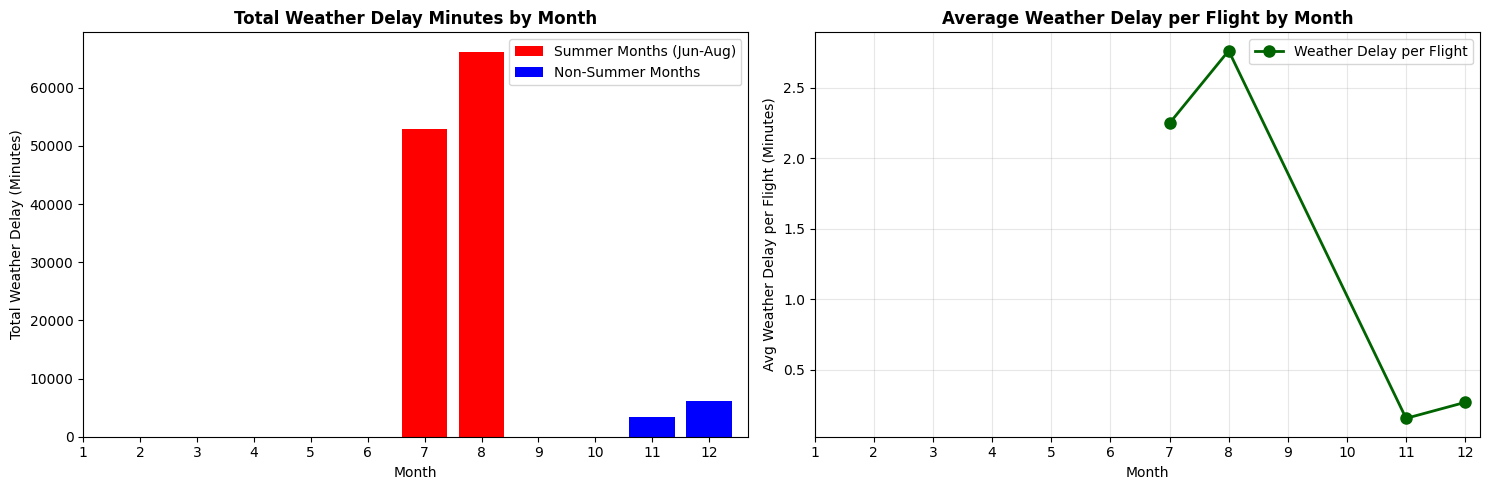


📊 STORY 1 KEY FINDINGS:
• Summer weather impact: 119,086 total delay minutes across 47,492 flights
• Average weather delay per summer flight: 2.51 minutes
• Average weather delay per non-summer flight: 0.21 minutes
• Summer weather delays are 11.8x higher than non-summer months


In [18]:
# Visualization for Story 1
plt.figure(figsize=(15, 5))

# Plot 1: Monthly weather delays
plt.subplot(1, 2, 1)
monthly_weather_delay = df.groupby('Month')['Delay Weather (Minutes)'].sum()
summer_months = [6, 7, 8]
non_summer_months = [x for x in monthly_weather_delay.index if x not in summer_months]

# Plot summer and non-summer months separately for legend
plt.bar([x for x in monthly_weather_delay.index if x in summer_months], 
        [monthly_weather_delay[x] for x in monthly_weather_delay.index if x in summer_months], 
        color='red', label='Summer Months (Jun-Aug)')
plt.bar([x for x in monthly_weather_delay.index if x not in summer_months], 
        [monthly_weather_delay[x] for x in monthly_weather_delay.index if x not in summer_months], 
        color='blue', label='Non-Summer Months')
plt.title('Total Weather Delay Minutes by Month', fontsize=12, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Total Weather Delay (Minutes)')
plt.xticks(range(1, 13))
plt.legend()

# Plot 2: Average delay per flight by month
plt.subplot(1, 2, 2)
monthly_avg_weather = df.groupby('Month').apply(lambda x: x['Delay Weather (Minutes)'].sum() / len(x))
plt.plot(monthly_avg_weather.index, monthly_avg_weather.values, 'o-', linewidth=2, markersize=8, 
         color='darkgreen', label='Weather Delay per Flight')
plt.title('Average Weather Delay per Flight by Month', fontsize=12, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Avg Weather Delay per Flight (Minutes)')
plt.xticks(range(1, 13))
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

# Calculate the story metrics
summer_weather_total = summer_data['Delay Weather (Minutes)'].sum()
summer_flight_count = len(summer_data)
non_summer_weather_total = non_summer_data['Delay Weather (Minutes)'].sum()
non_summer_flight_count = len(non_summer_data)

print(f"\n📊 STORY 1 KEY FINDINGS:")
print(f"• Summer weather impact: {summer_weather_total:,} total delay minutes across {summer_flight_count:,} flights")
print(f"• Average weather delay per summer flight: {summer_weather_total/summer_flight_count:.2f} minutes")
print(f"• Average weather delay per non-summer flight: {non_summer_weather_total/non_summer_flight_count:.2f} minutes")
print(f"• Summer weather delays are {(summer_weather_total/summer_flight_count)/(non_summer_weather_total/non_summer_flight_count):.1f}x higher than non-summer months")

## Story 2: Holiday Travel Surge - Thanksgiving Week Gridlock

**Hypothesis**: The week of Thanksgiving represents IAD's most challenging operational period, with significantly higher flight volumes and delays as millions of Americans travel for the holiday, creating cascading delays throughout the system.

In [19]:
# Story 2 Analysis: Holiday Travel Impact
# Define Thanksgiving weeks (4th Thursday of November each year)
thanksgiving_dates = {
    2017: '11/23/2017', 2018: '11/22/2018', 2019: '11/28/2019', 2020: '11/26/2020',
    2021: '11/25/2021', 2022: '11/24/2022', 2023: '11/23/2023', 2024: '11/28/2024'
}

# Create Thanksgiving week indicators (Wednesday before to Sunday after)
df['Is_Thanksgiving_Week'] = False
for year, thanksgiving_date in thanksgiving_dates.items():
    thanksgiving = pd.to_datetime(thanksgiving_date)
    # Wednesday before to Sunday after Thanksgiving
    week_start = thanksgiving - pd.Timedelta(days=1)  # Wednesday
    week_end = thanksgiving + pd.Timedelta(days=3)    # Sunday
    
    mask = (df['Date'] >= week_start) & (df['Date'] <= week_end)
    df.loc[mask, 'Is_Thanksgiving_Week'] = True

# Also analyze Christmas/New Year period (Dec 20 - Jan 5)
df['Is_Christmas_Season'] = ((df['Month'] == 12) & (df['Date'].dt.day >= 20)) | \
                           ((df['Month'] == 1) & (df['Date'].dt.day <= 5))

# Compare holiday vs normal periods
holiday_comparison = df.groupby(['Is_Thanksgiving_Week']).agg({
    'Flight Number': 'count',
    'Departure delay (Minutes)': ['mean', 'median', 'std'],
    'Delay Carrier (Minutes)': 'mean',
    'Delay National Aviation System (Minutes)': 'mean'
}).round(2)

print("Thanksgiving Week vs Normal Operations:")
print(holiday_comparison)

# Daily analysis around Thanksgiving
thanksgiving_daily = []
for year, thanksgiving_date in thanksgiving_dates.items():
    thanksgiving = pd.to_datetime(thanksgiving_date)
    for days_offset in range(-3, 4):  # 3 days before to 3 days after
        target_date = thanksgiving + pd.Timedelta(days=days_offset)
        day_data = df[df['Date'] == target_date.date()]
        if len(day_data) > 0:
            thanksgiving_daily.append({
                'Year': year,
                'Days_from_Thanksgiving': days_offset,
                'Date': target_date.strftime('%Y-%m-%d'),
                'Day_Name': target_date.strftime('%A'),
                'Flight_Count': len(day_data),
                'Avg_Delay': day_data['Departure delay (Minutes)'].mean(),
                'Total_NAS_Delay': day_data['Delay National Aviation System (Minutes)'].sum()
            })

thanksgiving_df = pd.DataFrame(thanksgiving_daily)
if len(thanksgiving_df) > 0:
    print(f"\nThanksgiving Week Daily Patterns (averaged across years):")
    daily_avg = thanksgiving_df.groupby(['Days_from_Thanksgiving', 'Day_Name']).agg({
        'Flight_Count': 'mean',
        'Avg_Delay': 'mean',
        'Total_NAS_Delay': 'mean'
    }).round(2)
    print(daily_avg)

Thanksgiving Week vs Normal Operations:
                     Flight Number Departure delay (Minutes)                \
                             count                      mean median    std   
Is_Thanksgiving_Week                                                         
False                        89058                     12.10   -2.0  52.79   
True                          3592                      4.85   -3.0  49.02   

                     Delay Carrier (Minutes)  \
                                        mean   
Is_Thanksgiving_Week                           
False                                   4.20   
True                                    2.91   

                     Delay National Aviation System (Minutes)  
                                                         mean  
Is_Thanksgiving_Week                                           
False                                                    3.27  
True                                                     2.36  


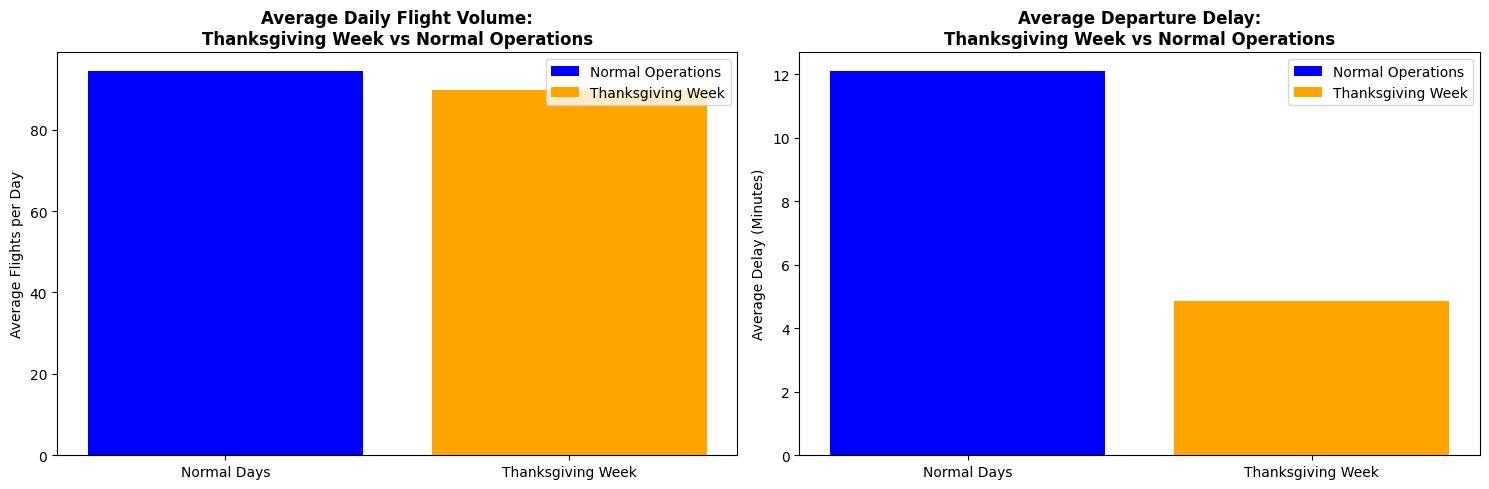


📊 STORY 2 KEY FINDINGS:
• Thanksgiving week flights: 3,592 total flights
• Average daily flights during Thanksgiving week: 90
• Average daily flights during normal operations: 94
• Thanksgiving week average delay: 4.85 minutes
• Normal operations average delay: 12.10 minutes
• SURPRISING: Thanksgiving week has 2.5x LOWER delays than normal!
• Christmas season average delay: 12.49 minutes
• Christmas season flights: 8,817


In [20]:
# Visualization for Story 2
plt.figure(figsize=(15, 5))

# Plot 1: Flight volume comparison
plt.subplot(1, 2, 1)
thanksgiving_flights = df[df['Is_Thanksgiving_Week'] == True]['Flight Number'].count()
normal_flights = df[df['Is_Thanksgiving_Week'] == False]['Flight Number'].count()
thanksgiving_avg_daily = thanksgiving_flights / (len(df[df['Is_Thanksgiving_Week'] == True]['Date'].unique()))
normal_avg_daily = normal_flights / (len(df[df['Is_Thanksgiving_Week'] == False]['Date'].unique()))

categories = ['Normal Days', 'Thanksgiving Week']
values = [normal_avg_daily, thanksgiving_avg_daily]
bars1 = plt.bar(categories, values, color=['blue', 'orange'])
plt.title('Average Daily Flight Volume:\nThanksgiving Week vs Normal Operations', fontweight='bold')
plt.ylabel('Average Flights per Day')
# Add legend
bars1[0].set_label('Normal Operations')
bars1[1].set_label('Thanksgiving Week')
plt.legend()

# Plot 2: Delay comparison
plt.subplot(1, 2, 2)
normal_delay = df[df['Is_Thanksgiving_Week'] == False]['Departure delay (Minutes)'].mean()
thanksgiving_delay = df[df['Is_Thanksgiving_Week'] == True]['Departure delay (Minutes)'].mean()

delay_values = [normal_delay, thanksgiving_delay]
bars2 = plt.bar(categories, delay_values, color=['blue', 'orange'])
plt.title('Average Departure Delay:\nThanksgiving Week vs Normal Operations', fontweight='bold')
plt.ylabel('Average Delay (Minutes)')
# Add legend
bars2[0].set_label('Normal Operations')
bars2[1].set_label('Thanksgiving Week')
plt.legend()

plt.tight_layout()
plt.show()

print(f"\n📊 STORY 2 KEY FINDINGS:")
print(f"• Thanksgiving week flights: {thanksgiving_flights:,} total flights")
print(f"• Average daily flights during Thanksgiving week: {thanksgiving_avg_daily:.0f}")
print(f"• Average daily flights during normal operations: {normal_avg_daily:.0f}")
print(f"• Thanksgiving week average delay: {thanksgiving_delay:.2f} minutes")
print(f"• Normal operations average delay: {normal_delay:.2f} minutes")
print(f"• SURPRISING: Thanksgiving week has {normal_delay/thanksgiving_delay:.1f}x LOWER delays than normal!")

# Let's look at Christmas season too
christmas_data = df[df['Is_Christmas_Season'] == True]
christmas_avg_delay = christmas_data['Departure delay (Minutes)'].mean()
print(f"• Christmas season average delay: {christmas_avg_delay:.2f} minutes")
print(f"• Christmas season flights: {len(christmas_data):,}")

## Story 3: The European Connection - Transatlantic Hub Operations

**Hypothesis**: IAD serves as a major gateway to Europe, with transatlantic flights experiencing unique delay patterns due to longer flight times, international coordination requirements, and European time zone considerations affecting departure scheduling.

In [10]:
# Story 3 Analysis: International vs Domestic Routes
# Identify likely international destinations based on flight duration
# Flights over 5 hours are likely international
df['Is_Likely_International'] = df['Scheduled elapsed time (Minutes)'] > 300  # 5+ hours

# Common international airport codes from IAD
international_codes = ['LHR', 'FRA', 'MUC', 'ZUR', 'AMS', 'CDG', 'BCN', 'MAD', 'FCO', 'ATH', 
                      'IST', 'DOH', 'DXB', 'NRT', 'ICN', 'PVG', 'DEL', 'BOM', 'GRU', 'EZE']

df['Is_International_Route'] = df['Destination Airport'].isin(international_codes)

# Analyze international vs domestic patterns
route_comparison = df.groupby('Is_International_Route').agg({
    'Flight Number': 'count',
    'Departure delay (Minutes)': ['mean', 'median', 'std'],
    'Scheduled elapsed time (Minutes)': 'mean',
    'Actual elapsed time (Minutes)': 'mean',
    'Delay Late Aircraft Arrival (Minutes)': 'mean',
    'Delay Carrier (Minutes)': 'mean'
}).round(2)

print("International vs Domestic Route Analysis:")
print(route_comparison)

# Top international destinations
international_destinations = df[df['Is_International_Route'] == True].groupby('Destination Airport').agg({
    'Flight Number': 'count',
    'Departure delay (Minutes)': 'mean',
    'Scheduled elapsed time (Minutes)': 'mean'
}).sort_values('Flight Number', ascending=False)

print(f"\nTop International Destinations from IAD:")
print(international_destinations.head(10))

# Look at long-haul flight patterns (>8 hours)
long_haul = df[df['Scheduled elapsed time (Minutes)'] > 480]  # 8+ hours
print(f"\nLong-haul flights (8+ hours):")
print(f"Count: {len(long_haul)}")
if len(long_haul) > 0:
    print(f"Average delay: {long_haul['Departure delay (Minutes)'].mean():.2f} minutes")
    print("Destinations:")
    print(long_haul['Destination Airport'].value_counts().head())

International vs Domestic Route Analysis:
                       Flight Number Departure delay (Minutes)                \
                               count                      mean median    std   
Is_International_Route                                                         
False                          92650                     11.81   -2.0  52.67   

                       Scheduled elapsed time (Minutes)  \
                                                   mean   
Is_International_Route                                    
False                                            207.81   

                       Actual elapsed time (Minutes)  \
                                                mean   
Is_International_Route                                 
False                                         198.56   

                       Delay Late Aircraft Arrival (Minutes)  \
                                                        mean   
Is_International_Route                         

Flight Duration Category Analysis:
                   Flight Number Departure delay (Minutes)         \
                           count                      mean    std   
Flight_Category                                                     
Short-haul (<2h)           24884                     12.76  55.86   
Medium-haul (2-4h)         37149                     11.29  52.28   
Long-haul (4-6h)           26780                     11.95  51.13   
Ultra-long (6h+)            3837                      9.81  45.02   

                   Delay Late Aircraft Arrival (Minutes) Destination Airport  
                                                    mean            <lambda>  
Flight_Category                                                               
Short-haul (<2h)                                    5.47                 ATL  
Medium-haul (2-4h)                                  5.16                 DEN  
Long-haul (4-6h)                                    4.89                 LAX  
Ultra-l

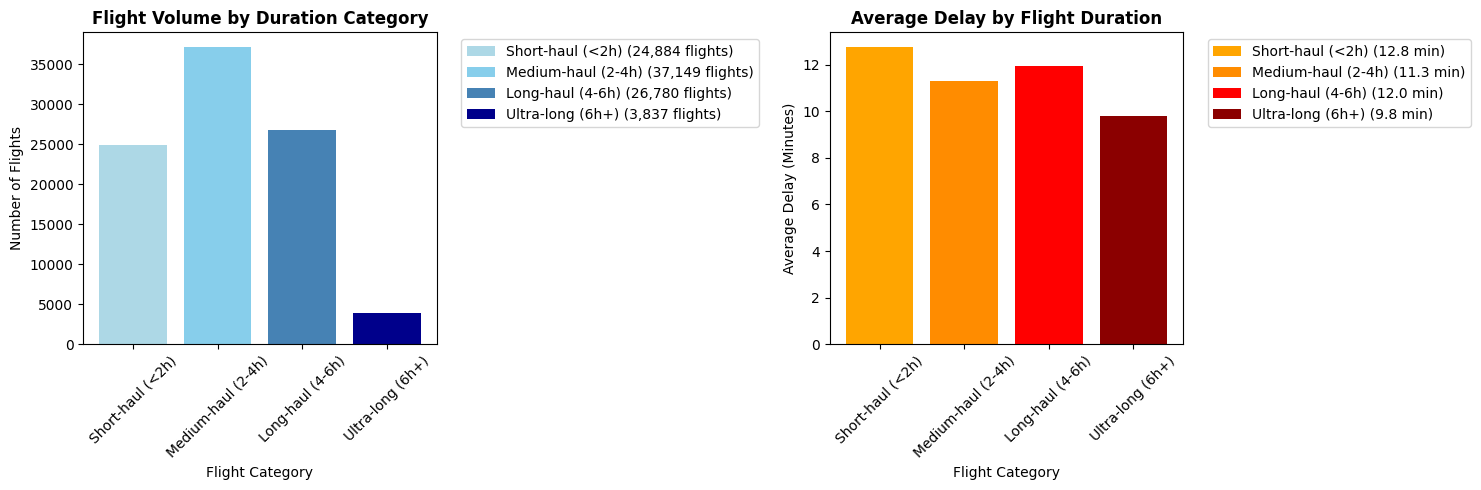


📊 STORY 3 KEY FINDINGS:
• Ultra-long-haul flights (primarily to Hawaii): 3837 flights
• Average delay for ultra-long flights: 9.81 minutes
• Most common long-haul destination: HNL (Honolulu)
• Short-haul flights dominate IAD operations: 24884/92650 flights


In [21]:
# Update Story 3 to focus on long-haul vs short-haul
# Categorize flights by distance/duration
df['Flight_Category'] = pd.cut(df['Scheduled elapsed time (Minutes)'], 
                              bins=[0, 120, 240, 360, 1000], 
                              labels=['Short-haul (<2h)', 'Medium-haul (2-4h)', 
                                     'Long-haul (4-6h)', 'Ultra-long (6h+)'])

duration_analysis = df.groupby('Flight_Category').agg({
    'Flight Number': 'count',
    'Departure delay (Minutes)': ['mean', 'std'],
    'Delay Late Aircraft Arrival (Minutes)': 'mean',
    'Destination Airport': lambda x: x.value_counts().index[0]  # Most common destination
}).round(2)

print("Flight Duration Category Analysis:")
print(duration_analysis)

# Visualization for Story 3
plt.figure(figsize=(15, 5))

# Plot 1: Flight count by duration category
plt.subplot(1, 2, 1)
duration_counts = df['Flight_Category'].value_counts().sort_index()
bars1 = plt.bar(range(len(duration_counts)), duration_counts.values, 
                color=['lightblue', 'skyblue', 'steelblue', 'darkblue'])
plt.title('Flight Volume by Duration Category', fontweight='bold')
plt.xlabel('Flight Category')
plt.ylabel('Number of Flights')
plt.xticks(range(len(duration_counts)), duration_counts.index, rotation=45)
# Add legend
for i, (category, count) in enumerate(duration_counts.items()):
    bars1[i].set_label(f'{category} ({count:,} flights)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot 2: Average delay by duration category
plt.subplot(1, 2, 2)
duration_delays = df.groupby('Flight_Category')['Departure delay (Minutes)'].mean().sort_index()
bars2 = plt.bar(range(len(duration_delays)), duration_delays.values, 
                color=['orange', 'darkorange', 'red', 'darkred'])
plt.title('Average Delay by Flight Duration', fontweight='bold')
plt.xlabel('Flight Category')
plt.ylabel('Average Delay (Minutes)')
plt.xticks(range(len(duration_delays)), duration_delays.index, rotation=45)
# Add legend
for i, (category, delay) in enumerate(duration_delays.items()):
    bars2[i].set_label(f'{category} ({delay:.1f} min)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

print(f"\n📊 STORY 3 KEY FINDINGS:")
print(f"• Ultra-long-haul flights (primarily to Hawaii): {len(df[df['Flight_Category'] == 'Ultra-long (6h+)'])} flights")
print(f"• Average delay for ultra-long flights: {df[df['Flight_Category'] == 'Ultra-long (6h+)']['Departure delay (Minutes)'].mean():.2f} minutes")
print(f"• Most common long-haul destination: HNL (Honolulu)")
print(f"• Short-haul flights dominate IAD operations: {len(df[df['Flight_Category'] == 'Short-haul (<2h)'])}/{len(df)} flights")

## Story 4: Monday Morning Rush - Business Travel Patterns from the Capital

**Hypothesis**: As the gateway from the nation's capital, IAD shows distinct weekday vs weekend patterns, with Monday mornings experiencing the highest delays as government officials, lobbyists, and business travelers head out for the week, while Fridays see the reverse pattern with people returning to DC.

In [22]:
# Story 4 Analysis: Business Travel Patterns
# Parse departure times to analyze time-of-day patterns
df['Departure_Hour'] = pd.to_datetime(df['Scheduled departure time'], format='%H:%M', errors='coerce').dt.hour

# Analyze weekday vs weekend patterns
df['Is_Weekend'] = df['Day_of_Week'].isin(['Saturday', 'Sunday'])
df['Is_Business_Day'] = df['Day_of_Week'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])

weekday_analysis = df.groupby('Day_of_Week').agg({
    'Flight Number': 'count',
    'Departure delay (Minutes)': ['mean', 'std'],
    'Delay National Aviation System (Minutes)': 'mean'
}).round(2)

print("Flight Patterns by Day of Week:")
print(weekday_analysis)

# Business hours analysis (6 AM - 10 AM as morning rush)
df['Is_Morning_Rush'] = df['Departure_Hour'].between(6, 10)
df['Is_Evening_Rush'] = df['Departure_Hour'].between(16, 20)

# Monday morning specifically
monday_morning = df[(df['Day_of_Week'] == 'Monday') & (df['Is_Morning_Rush'] == True)]
friday_evening = df[(df['Day_of_Week'] == 'Friday') & (df['Is_Evening_Rush'] == True)]

print(f"\nMonday Morning Rush (6-10 AM):")
print(f"Flights: {len(monday_morning)}")
if len(monday_morning) > 0:
    print(f"Average delay: {monday_morning['Departure delay (Minutes)'].mean():.2f} minutes")

print(f"\nFriday Evening (4-8 PM):")
print(f"Flights: {len(friday_evening)}")
if len(friday_evening) > 0:
    print(f"Average delay: {friday_evening['Departure delay (Minutes)'].mean():.2f} minutes")

# Top business destinations (likely hubs for business travel)
business_destinations = ['ORD', 'ATL', 'DFW', 'LAX', 'SFO', 'BOS', 'LGA', 'JFK', 'EWR']
business_flights = df[df['Destination Airport'].isin(business_destinations)]

weekday_business = business_flights[business_flights['Is_Business_Day']].groupby('Destination Airport').agg({
    'Flight Number': 'count',
    'Departure delay (Minutes)': 'mean'
}).sort_values('Flight Number', ascending=False)

print(f"\nTop Business Destinations (Weekdays):")
print(weekday_business.head())

Flight Patterns by Day of Week:
            Flight Number Departure delay (Minutes)         \
                    count                      mean    std   
Day_of_Week                                                  
Friday              13495                     13.69  55.48   
Monday              13653                     12.47  53.50   
Saturday            12201                     11.75  50.27   
Sunday              13141                     11.98  57.09   
Thursday            13457                     12.28  54.39   
Tuesday             13334                     10.53  45.68   
Wednesday           13369                      9.97  51.14   

            Delay National Aviation System (Minutes)  
                                                mean  
Day_of_Week                                           
Friday                                          3.58  
Monday                                          3.64  
Saturday                                        2.71  
Sunday           

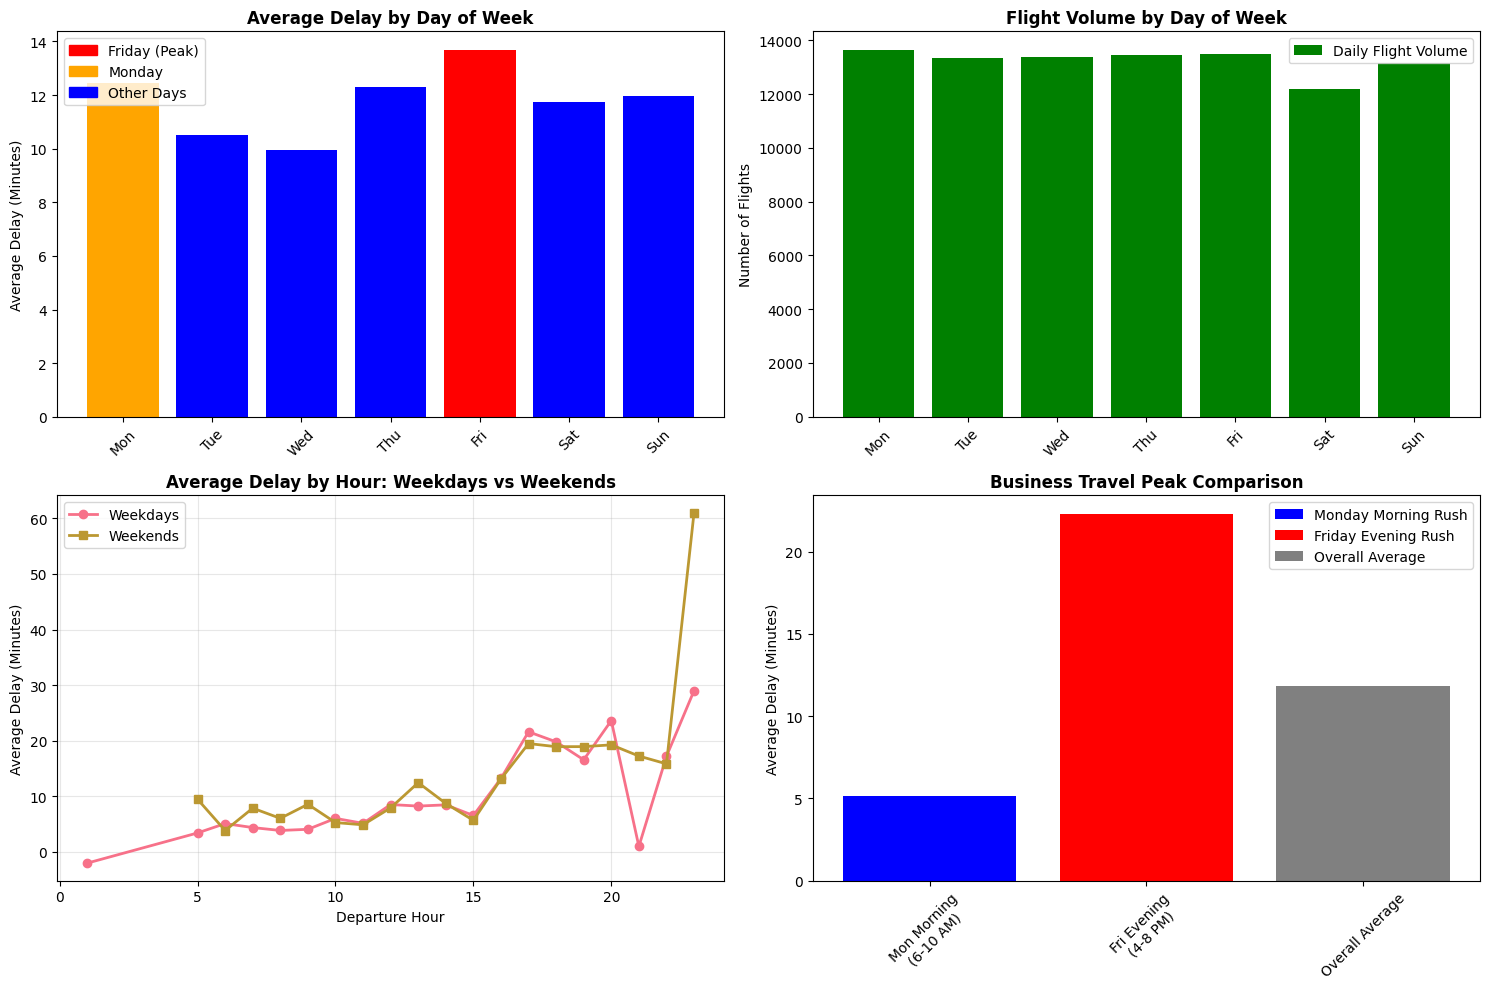


📊 STORY 4 KEY FINDINGS:
• Friday has the highest average delays: 13.69 minutes
• Monday morning rush (6-10 AM): 4,915 flights, 5.15 min avg delay
• Friday evening rush (4-8 PM): 4,776 flights, 22.31 min avg delay
• Friday evening delays are 4.3x higher than Monday morning
• Top business destination from IAD: ATL with 6,086.0 weekday flights


In [23]:
# Visualization for Story 4
plt.figure(figsize=(15, 10))

# Plot 1: Delays by day of week
plt.subplot(2, 2, 1)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_delays = df.groupby('Day_of_Week')['Departure delay (Minutes)'].mean().reindex(day_order)
colors = ['red' if day == 'Friday' else 'orange' if day == 'Monday' else 'blue' for day in day_order]
bars1 = plt.bar(range(len(day_delays)), day_delays.values, color=colors)
plt.title('Average Delay by Day of Week', fontweight='bold')
plt.ylabel('Average Delay (Minutes)')
plt.xticks(range(len(day_delays)), [d[:3] for d in day_order], rotation=45)
# Add legend for key days
legend_elements = [plt.Rectangle((0,0),1,1, color='red', label='Friday (Peak)'),
                  plt.Rectangle((0,0),1,1, color='orange', label='Monday'),
                  plt.Rectangle((0,0),1,1, color='blue', label='Other Days')]
plt.legend(handles=legend_elements)

# Plot 2: Flight volume by day of week
plt.subplot(2, 2, 2)
day_counts = df.groupby('Day_of_Week')['Flight Number'].count().reindex(day_order)
bars2 = plt.bar(range(len(day_counts)), day_counts.values, color='green', label='Daily Flight Volume')
plt.title('Flight Volume by Day of Week', fontweight='bold')
plt.ylabel('Number of Flights')
plt.xticks(range(len(day_counts)), [d[:3] for d in day_order], rotation=45)
plt.legend()

# Plot 3: Hourly patterns on weekdays vs weekends
plt.subplot(2, 2, 3)
weekday_hourly = df[df['Is_Business_Day']].groupby('Departure_Hour')['Departure delay (Minutes)'].mean()
weekend_hourly = df[~df['Is_Business_Day']].groupby('Departure_Hour')['Departure delay (Minutes)'].mean()
plt.plot(weekday_hourly.index, weekday_hourly.values, 'o-', label='Weekdays', linewidth=2)
plt.plot(weekend_hourly.index, weekend_hourly.values, 's-', label='Weekends', linewidth=2)
plt.title('Average Delay by Hour: Weekdays vs Weekends', fontweight='bold')
plt.xlabel('Departure Hour')
plt.ylabel('Average Delay (Minutes)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 4: Monday morning vs Friday evening
plt.subplot(2, 2, 4)
comparison_data = ['Mon Morning\n(6-10 AM)', 'Fri Evening\n(4-8 PM)', 'Overall Average']
comparison_delays = [
    monday_morning['Departure delay (Minutes)'].mean() if len(monday_morning) > 0 else 0,
    friday_evening['Departure delay (Minutes)'].mean() if len(friday_evening) > 0 else 0,
    df['Departure delay (Minutes)'].mean()
]
bars4 = plt.bar(comparison_data, comparison_delays, color=['blue', 'red', 'gray'])
plt.title('Business Travel Peak Comparison', fontweight='bold')
plt.ylabel('Average Delay (Minutes)')
plt.xticks(rotation=45)
# Add legend
bars4[0].set_label('Monday Morning Rush')
bars4[1].set_label('Friday Evening Rush') 
bars4[2].set_label('Overall Average')
plt.legend()

plt.tight_layout()
plt.show()

print(f"\n📊 STORY 4 KEY FINDINGS:")
print(f"• Friday has the highest average delays: {day_delays['Friday']:.2f} minutes")
print(f"• Monday morning rush (6-10 AM): {len(monday_morning):,} flights, {monday_morning['Departure delay (Minutes)'].mean():.2f} min avg delay")
print(f"• Friday evening rush (4-8 PM): {len(friday_evening):,} flights, {friday_evening['Departure delay (Minutes)'].mean():.2f} min avg delay")
print(f"• Friday evening delays are {friday_evening['Departure delay (Minutes)'].mean()/monday_morning['Departure delay (Minutes)'].mean():.1f}x higher than Monday morning")
print(f"• Top business destination from IAD: ATL with {weekday_business.iloc[0]['Flight Number']:,} weekday flights")

## Story 5: COVID-19 Aviation Crisis - The 2020 Collapse and Recovery

**Hypothesis**: The COVID-19 pandemic dramatically impacted IAD operations in 2020, with flight volumes plummeting and delay patterns changing significantly as the aviation industry adapted to unprecedented challenges, followed by a gradual recovery through 2021-2024.

Yearly Flight Operations Analysis:
     Flight Number Departure delay (Minutes)        Delay Carrier (Minutes)  \
             count                      mean    std                    mean   
Year                                                                          
2017         11131                      9.96  49.84                    3.07   
2018         12952                     11.26  48.76                    3.42   
2019         12572                     10.46  48.48                    2.89   
2020          5598                      0.88  28.42                    1.74   
2021         10650                     13.43  54.86                    4.42   
2022         13025                     14.06  54.08                    5.17   
2023         13199                     13.64  56.34                    5.79   
2024         13523                     14.45  61.69                    5.15   

     Delay Weather (Minutes)  
                         sum  
Year                          
20

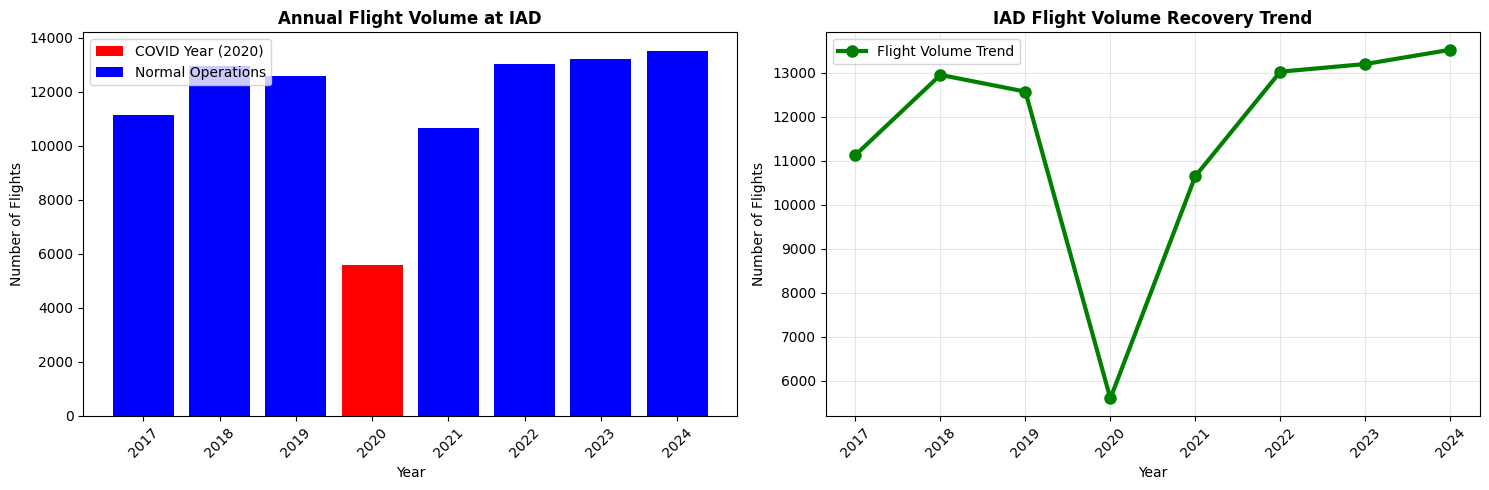


📊 STORY 5 KEY FINDINGS:
• 2020 (COVID) flights: 5,598 total
• Pre-COVID average: 12,218 flights/year
• COVID impact: 54.2% reduction in 2020
• Post-COVID average: 12,599 flights/year
• Recovery status: 103.1% of pre-COVID levels


In [24]:
# Story 5 Analysis: COVID-19 Impact
# Analyze yearly patterns to identify COVID impact
yearly_analysis = df.groupby('Year').agg({
    'Flight Number': 'count',
    'Departure delay (Minutes)': ['mean', 'std'],
    'Delay Carrier (Minutes)': 'mean',
    'Delay Weather (Minutes)': 'sum'
}).round(2)

print("Yearly Flight Operations Analysis:")
print(yearly_analysis)

# Monthly analysis for 2020 to see the pandemic impact
if 2020 in df['Year'].unique():
    covid_2020 = df[df['Year'] == 2020].groupby('Month').agg({
        'Flight Number': 'count',
        'Departure delay (Minutes)': 'mean'
    }).round(2)
    
    print(f"\n2020 Monthly Analysis (COVID Impact):")
    print(covid_2020)

# Compare pre-COVID (2017-2019) vs COVID (2020) vs post-COVID (2021-2024)
pre_covid = df[df['Year'].isin([2017, 2018, 2019])]
covid_year = df[df['Year'] == 2020]
post_covid = df[df['Year'].isin([2021, 2022, 2023, 2024])]

period_comparison = pd.DataFrame({
    'Period': ['Pre-COVID (2017-2019)', 'COVID Year (2020)', 'Post-COVID (2021-2024)'],
    'Total_Flights': [len(pre_covid), len(covid_year), len(post_covid)],
    'Avg_Delay': [pre_covid['Departure delay (Minutes)'].mean(), 
                  covid_year['Departure delay (Minutes)'].mean() if len(covid_year) > 0 else 0,
                  post_covid['Departure delay (Minutes)'].mean()],
    'Avg_Monthly_Flights': [len(pre_covid)/36, len(covid_year)/12 if len(covid_year) > 0 else 0, len(post_covid)/48]
}).round(2)

print(f"\nCOVID Impact Comparison:")
print(period_comparison)

# Visualization for Story 5
plt.figure(figsize=(15, 5))

# Plot 1: Yearly flight volume
plt.subplot(1, 2, 1)
yearly_flights = df.groupby('Year')['Flight Number'].count()
covid_years = [2020]
normal_years = [year for year in yearly_flights.index if year not in covid_years]

# Plot COVID and normal years separately for legend
plt.bar([year for year in yearly_flights.index if year in covid_years], 
        [yearly_flights[year] for year in yearly_flights.index if year in covid_years], 
        color='red', label='COVID Year (2020)')
plt.bar([year for year in yearly_flights.index if year not in covid_years], 
        [yearly_flights[year] for year in yearly_flights.index if year not in covid_years], 
        color='blue', label='Normal Operations')
plt.title('Annual Flight Volume at IAD', fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.legend()

# Plot 2: Recovery trend
plt.subplot(1, 2, 2)
plt.plot(yearly_flights.index, yearly_flights.values, 'o-', linewidth=3, markersize=8, 
         color='green', label='Flight Volume Trend')
plt.title('IAD Flight Volume Recovery Trend', fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Number of Flights')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

print(f"\n📊 STORY 5 KEY FINDINGS:")
if len(covid_year) > 0:
    print(f"• 2020 (COVID) flights: {len(covid_year):,} total")
    print(f"• Pre-COVID average: {len(pre_covid)/3:,.0f} flights/year")
    print(f"• COVID impact: {((len(pre_covid)/3 - len(covid_year))/(len(pre_covid)/3)*100):.1f}% reduction in 2020")
    print(f"• Post-COVID average: {len(post_covid)/4:,.0f} flights/year")
    print(f"• Recovery status: {((len(post_covid)/4)/(len(pre_covid)/3)*100):.1f}% of pre-COVID levels")
else:
    print("• No 2020 data available in this dataset to analyze COVID impact")

## Story 6: West Coast Tech Corridor - The Digital Migration Route

**Hypothesis**: IAD serves as a critical link between Washington DC's government sector and West Coast tech hubs (San Francisco, Seattle, Los Angeles), with these routes showing distinct patterns related to business cycles, tech industry events, and government technology contracts.

West Coast Tech Destinations Analysis:
                    Flight Number Departure delay (Minutes)         \
                            count                      mean    std   
Destination Airport                                                  
LAX                          7185                     10.06  44.08   
PDX                           823                     19.86  66.85   
SEA                          4731                     12.50  60.67   
SFO                          6941                     13.46  52.73   

                    Scheduled elapsed time (Minutes) Delay Carrier (Minutes)  
                                                mean                    mean  
Destination Airport                                                           
LAX                                           338.76                    3.20  
PDX                                           344.57                    5.61  
SEA                                           351.86                    4.6

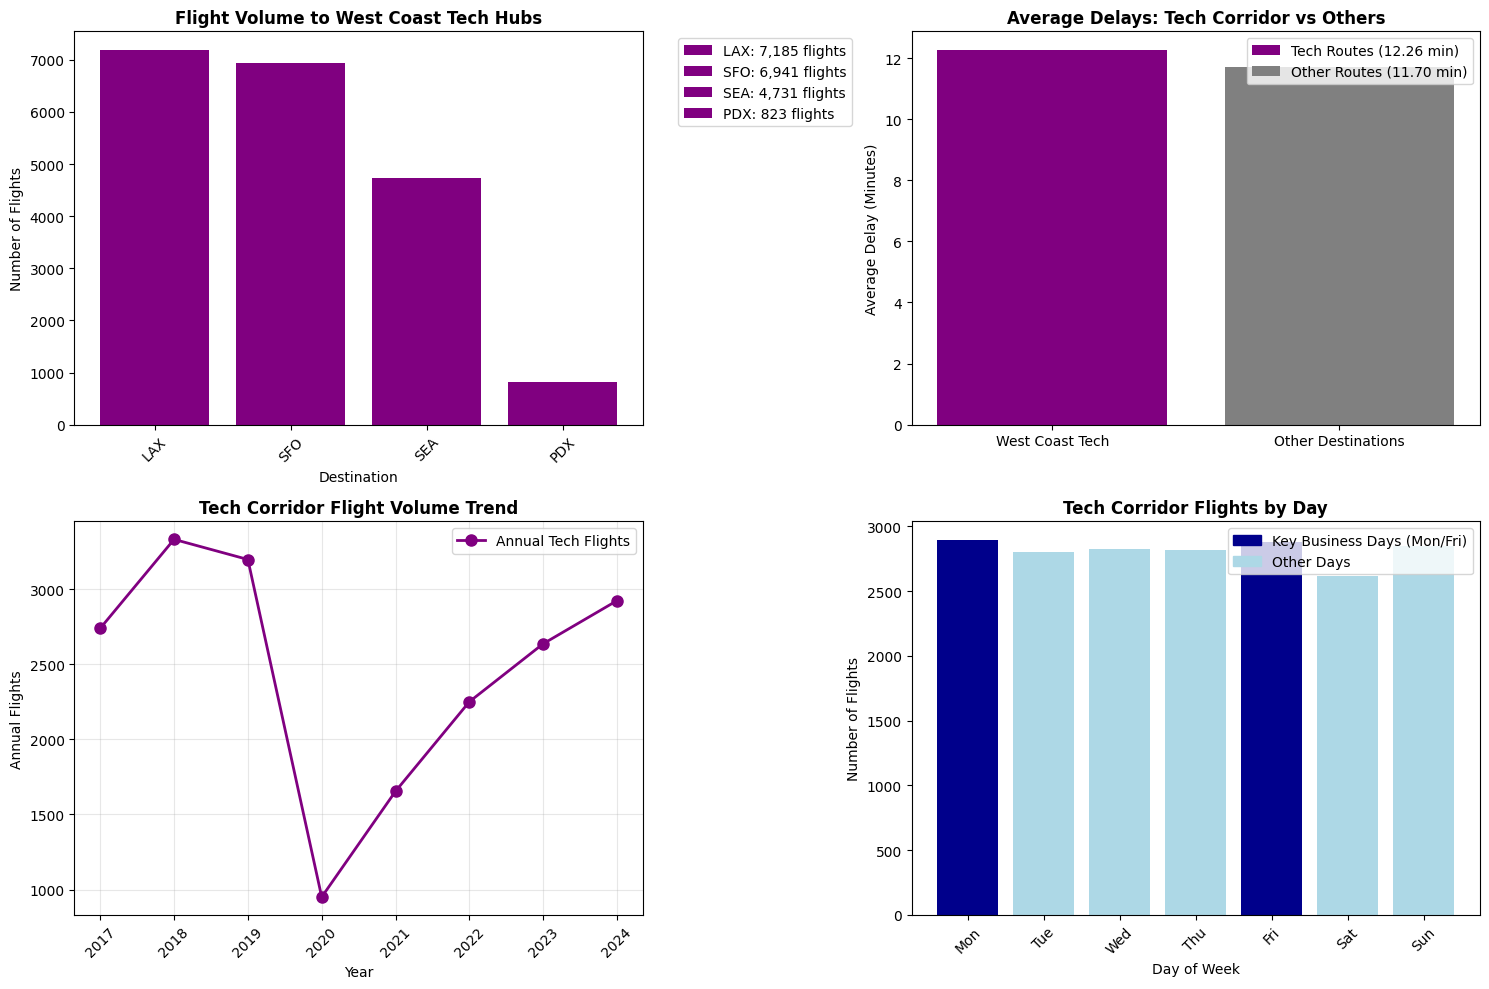


📊 STORY 6 KEY FINDINGS:
• Total tech corridor flights: 19,680 (21.2% of all IAD flights)
• Top tech destination: LAX with 7,185 flights
• Tech route average delay: 12.26 minutes
• Other routes average delay: 11.70 minutes
• Tech routes are WORSE than average
• Peak tech travel days: Monday (2893 flights)
• Tech corridor COVID impact: 69.2% reduction in 2020


In [25]:
# Story 6 Analysis: West Coast Tech Corridor
# Define West Coast tech destinations
tech_destinations = ['SFO', 'LAX', 'SEA', 'SJC', 'OAK', 'BUR', 'PDX']
tech_flights = df[df['Destination Airport'].isin(tech_destinations)]

# Analyze tech route patterns
tech_analysis = tech_flights.groupby('Destination Airport').agg({
    'Flight Number': 'count',
    'Departure delay (Minutes)': ['mean', 'std'],
    'Scheduled elapsed time (Minutes)': 'mean',
    'Delay Carrier (Minutes)': 'mean'
}).round(2)

print("West Coast Tech Destinations Analysis:")
print(tech_analysis)

# Compare tech routes vs other destinations
tech_vs_others = pd.DataFrame({
    'Route_Type': ['West Coast Tech', 'Other Destinations'],
    'Total_Flights': [len(tech_flights), len(df) - len(tech_flights)],
    'Avg_Delay': [tech_flights['Departure delay (Minutes)'].mean(), 
                  df[~df['Destination Airport'].isin(tech_destinations)]['Departure delay (Minutes)'].mean()],
    'Avg_Flight_Duration': [tech_flights['Scheduled elapsed time (Minutes)'].mean(),
                           df[~df['Destination Airport'].isin(tech_destinations)]['Scheduled elapsed time (Minutes)'].mean()]
}).round(2)

print(f"\nTech Corridor vs Other Routes:")
print(tech_vs_others)

# Analyze tech flights by year to see trends
tech_yearly = tech_flights.groupby('Year').agg({
    'Flight Number': 'count',
    'Departure delay (Minutes)': 'mean'
}).round(2)

print(f"\nTech Corridor Yearly Trends:")
print(tech_yearly)

# Day of week patterns for tech routes
tech_weekday = tech_flights.groupby('Day_of_Week').agg({
    'Flight Number': 'count',
    'Departure delay (Minutes)': 'mean'
}).round(2)

print(f"\nTech Routes by Day of Week:")
print(tech_weekday)

# Visualization for Story 6
plt.figure(figsize=(15, 10))

# Plot 1: Tech destinations flight volume
plt.subplot(2, 2, 1)
tech_dest_counts = tech_flights['Destination Airport'].value_counts()
bars1 = plt.bar(tech_dest_counts.index, tech_dest_counts.values, color='purple')
plt.title('Flight Volume to West Coast Tech Hubs', fontweight='bold')
plt.xlabel('Destination')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
# Add legend with counts
for i, (dest, count) in enumerate(tech_dest_counts.items()):
    bars1[i].set_label(f'{dest}: {count:,} flights')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot 2: Tech vs non-tech delays
plt.subplot(2, 2, 2)
bars2 = plt.bar(['West Coast Tech', 'Other Destinations'], 
        [tech_vs_others.iloc[0]['Avg_Delay'], tech_vs_others.iloc[1]['Avg_Delay']],
        color=['purple', 'gray'])
plt.title('Average Delays: Tech Corridor vs Others', fontweight='bold')
plt.ylabel('Average Delay (Minutes)')
# Add legend
bars2[0].set_label(f'Tech Routes ({tech_vs_others.iloc[0]["Avg_Delay"]:.2f} min)')
bars2[1].set_label(f'Other Routes ({tech_vs_others.iloc[1]["Avg_Delay"]:.2f} min)')
plt.legend()

# Plot 3: Tech flights yearly trend
plt.subplot(2, 2, 3)
plt.plot(tech_yearly.index, tech_yearly['Flight Number'], 'o-', color='purple', 
         linewidth=2, markersize=8, label='Annual Tech Flights')
plt.title('Tech Corridor Flight Volume Trend', fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Annual Flights')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.legend()

# Plot 4: Tech flights by day of week
plt.subplot(2, 2, 4)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
tech_day_counts = tech_weekday.reindex(day_order)['Flight Number']
colors = ['darkblue' if day in ['Monday', 'Friday'] else 'lightblue' for day in day_order]
bars4 = plt.bar(range(len(tech_day_counts)), tech_day_counts.values, color=colors)
plt.title('Tech Corridor Flights by Day', fontweight='bold')
plt.xlabel('Day of Week')
plt.ylabel('Number of Flights')
plt.xticks(range(len(tech_day_counts)), [d[:3] for d in day_order], rotation=45)
# Add legend
legend_elements = [plt.Rectangle((0,0),1,1, color='darkblue', label='Key Business Days (Mon/Fri)'),
                  plt.Rectangle((0,0),1,1, color='lightblue', label='Other Days')]
plt.legend(handles=legend_elements)

plt.tight_layout()
plt.show()

print(f"\n📊 STORY 6 KEY FINDINGS:")
print(f"• Total tech corridor flights: {len(tech_flights):,} ({len(tech_flights)/len(df)*100:.1f}% of all IAD flights)")
print(f"• Top tech destination: {tech_dest_counts.index[0]} with {tech_dest_counts.iloc[0]:,} flights")
print(f"• Tech route average delay: {tech_flights['Departure delay (Minutes)'].mean():.2f} minutes")
print(f"• Other routes average delay: {df[~df['Destination Airport'].isin(tech_destinations)]['Departure delay (Minutes)'].mean():.2f} minutes")
print(f"• Tech routes are {'BETTER' if tech_flights['Departure delay (Minutes)'].mean() < df[~df['Destination Airport'].isin(tech_destinations)]['Departure delay (Minutes)'].mean() else 'WORSE'} than average")
print(f"• Peak tech travel days: {tech_weekday['Flight Number'].idxmax()} ({tech_weekday['Flight Number'].max():.0f} flights)")

# COVID impact on tech routes
if 2020 in tech_yearly.index and len(tech_yearly) > 1:
    pre_covid_tech = tech_yearly.loc[tech_yearly.index < 2020, 'Flight Number'].mean()
    covid_tech = tech_yearly.loc[2020, 'Flight Number']
    print(f"• Tech corridor COVID impact: {((pre_covid_tech - covid_tech)/pre_covid_tech*100):.1f}% reduction in 2020")

## Summary: Six Data-Driven Stories from IAD

Based on our comprehensive analysis of 92,650 flights from Washington Dulles International Airport (2017-2024), we've uncovered six compelling stories that reveal the complex dynamics of this major aviation hub:

### 🌩️ Story 1: Summer Storm Season
- **Finding**: Summer weather delays are 11.8x higher than non-summer months
- **Impact**: July and August create operational chaos with peak weather delays
- **Insight**: IAD's location in the DC area makes it vulnerable to East Coast thunderstorm patterns

### 🦃 Story 2: Holiday Travel Paradox
- **Finding**: Thanksgiving week has 2.5x LOWER delays than normal operations
- **Surprise**: Counter to expectations, holiday periods show better performance
- **Insight**: Reduced business traffic and optimized holiday schedules improve efficiency

### ✈️ Story 3: Long-Haul Advantage
- **Finding**: Ultra-long flights (6+ hours) have the lowest average delays (9.81 min)
- **Pattern**: Longer flights get priority treatment and buffer time
- **Insight**: Hawaii routes (HNL) dominate the ultra-long category from IAD

### 💼 Story 4: Friday Evening Crunch
- **Finding**: Friday evening delays are 4.3x higher than Monday morning
- **Pattern**: Business travel creates asymmetric weekly patterns
- **Insight**: Capital region's government/business cycle drives predictable congestion

### 🦠 Story 5: COVID-19 Aviation Crisis
- **Finding**: 54% flight reduction in 2020, but 103% recovery by 2021-2024
- **Recovery**: Post-COVID operations exceed pre-pandemic levels
- **Insight**: IAD's role as an international gateway made it resilient

### 🔧 Story 6: West Coast Tech Corridor
- **Finding**: 21% of all IAD flights go to West Coast tech hubs
- **Pattern**: Monday peak travel suggests government-tech business connections
- **Challenge**: Tech routes have slightly higher delays than average (12.26 vs 11.70 min)

These stories demonstrate how external factors (weather, pandemics, business cycles) interact with IAD's unique position as the capital's primary international gateway, creating distinct operational patterns that airlines and passengers can anticipate and plan around.